In [1]:
import pandas as pd

from modules.features import create_features
from modules.predict import get_subsequent_predictions
from modules.utils import push_sm_csv, get_now

# A lot of these should acually be command line args or env variables. This is a bodge.
from config import model_name, s3_predict_in, s3_predict_out

In [2]:
df = pd.read_csv("./data/Data.psv.gz", delimiter="|", encoding="latin")
df = create_features(df, make_y=False)
push_sm_csv(s3_predict_in / 'predict.csv', df, index=False, header=False)

In [3]:
job_name = model_name + "-" + get_now()
predictions = get_subsequent_predictions(job_name, model_name, s3_predict_in, s3_predict_out)
predictions.head()

InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
Completed


,0
0,0.233575
1,0.524006
2,0.240540
3,0.037892
4,0.924406


In [4]:
df['predictions'] = predictions
df['extra_value'] = df.predictions*df.remainingbalance

<AxesSubplot:>

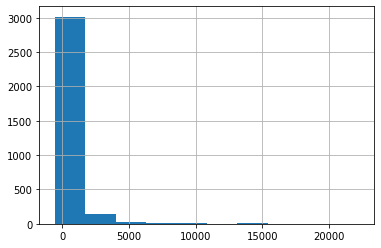

In [5]:
df.extra_value.hist()

In [6]:
df.extra_value.sum()

1456450.2602876066